<시작하세요! 텐서플로 2.0 프로그래밍> 예제코드입니다.

- 예제 코드를 실행하기 위해서는 [파일] > [드라이브에 사본 저장]으로 본인의 계정에 사본을 만든 다음 실행하면 됩니다.
- 예제 코드는 [깃허브 저장소](https://github.com/wikibook/tf2)에서도 동일하게 제공됩니다. 예제에 대한 질문이나 책에 대한 질문은 깃허브 저장소의 [Issues](https://github.com/wikibook/tf2/issues)에 올려주세요.
- 각 장의 예제 파일은 처음부터 끝까지 실행하는 상황을 가정하고 작성되었습니다. 혹시 세션이 다운되는 등의 이유로 실행이 되지 않는 경우가 있다면, 필요한 라이브러리를 import 하신 후에 실행하시면 됩니다. (tensorflow, numpy, pandas 등)

In [1]:
# 텐서플로 2 버전 선택
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf

import os

os.environ["CUDA_VISIBLE_DEVICES"]="0"
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
if gpus:
    try:
        tf.config.experimental.set_memory_growth(gpus[0], True)
    except RuntimeError as e:
        print(e)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# 6.2 주요 레이어 정리

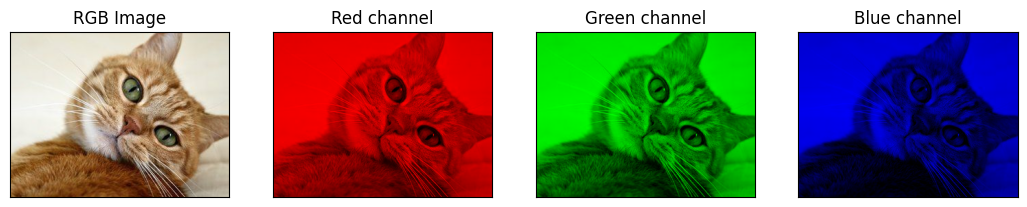

In [2]:
# 그림 6.8 출력 코드. 참고 링크 : https://stackoverflow.com/a/37435090/2689257
import matplotlib.pyplot as plt

image_path = tf.keras.utils.get_file('cat.jpg', 'http://bit.ly/33U6mH9')
image = plt.imread(image_path)

titles = ['RGB Image', 'Red channel', 'Green channel', 'Blue channel']
cmaps = [None, plt.cm.Reds_r, plt.cm.Greens_r, plt.cm.Blues_r]

from numpy import array, zeros_like
def channel(image, color): #해당 칼러를 추출
    if color not in (0, 1, 2): return image
    c = image[..., color]
    z = zeros_like(c)
    return array([(c, z, z), (z, c, z), (z, z, c)][color]).transpose(1,2,0)
  
colors = range(-1, 3)
fig, axes = plt.subplots(1, 4, figsize=(13,3))
objs = zip(axes, titles, colors)
for ax, title, color in objs:
    ax.imshow(channel(image, color))
    ax.set_title(title)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

In [3]:
# 6.1 Conv2D 레이어 생성 코드 - 필터는 가중치값의 행렬
conv1 = tf.keras.layers.Conv2D(kernel_size=(3,3),strides=(2,2),padding='valid' ,filters=16)
# 필터가 합성곱층의 가중치 파라미터 W에 해당 > 학습단계에서 적절한 필터를 찾도록 학습

In [4]:
# 6.2 MaxPool2D 레이어 생성 코드 - 가중치가 없음  > 학습되지 않음
pool1 = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2))

In [5]:
# 6.3 Dropout 레이어 생성 코드 - 가중치 없다 > 학습 없다
pool1 = tf.keras.layers.Dropout(rate=0.3)

# 6.3 Fashion MNIST with CNN

In [6]:
# http://taewan.kim/post/cnn/ > 컨볼루션 학습에 도움이 된다 
# https://wikidocs.net/62306
# https://89douner.tistory.com/57

# 6.4 Fashion MNIST 데이터셋 불러오기 및 정규화
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

train_X = train_X / 255.0 # 정규화
test_X = test_X / 255.0

In [7]:
# 6.5 데이터를 채널을 가진 이미지 형태(3차원)으로 바꾸기
# reshape 이전
print(train_X.shape, test_X.shape)

train_X = train_X.reshape(-1, 28, 28, 1) # 흑백 채널 추가 - (60000, 28, 28, 1) 
test_X = test_X.reshape(-1, 28, 28, 1)

# reshape 이후
print(train_X.shape, test_X.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


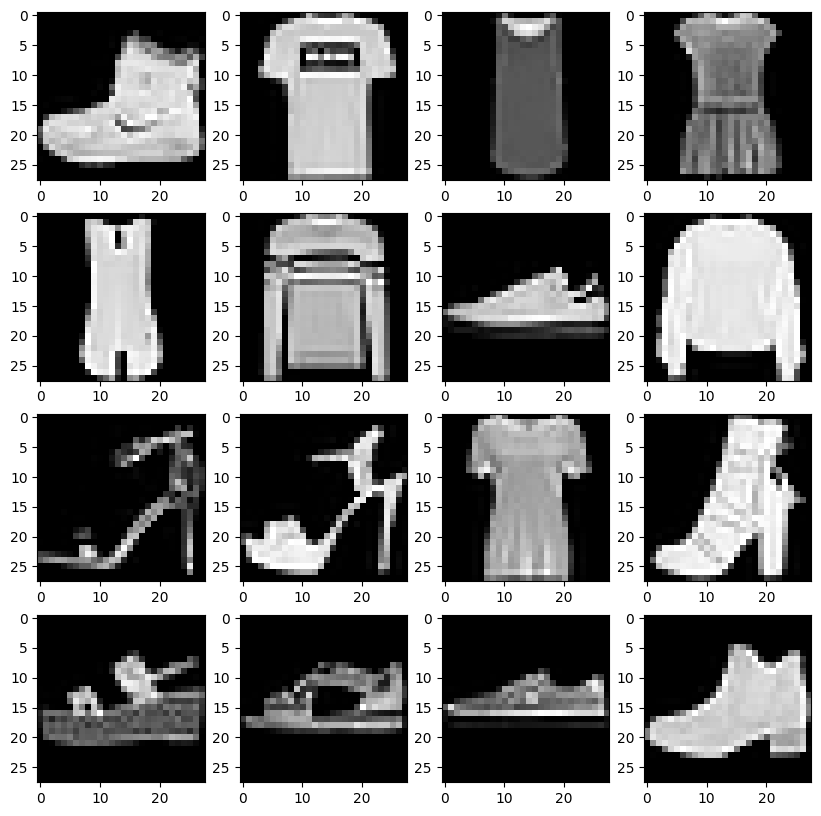

[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9]


In [8]:
# 6.6 데이터 확인
import matplotlib.pyplot as plt
# 전체 그래프의 사이즈를 width=10, height=10 으로 지정합니다.
plt.figure(figsize=(10, 10))
for c in range(16):
    # 4행 4열로 지정한 grid 에서 c+1 번째의 칸에 그래프를 그립니다. 1~16 번째 칸을 채우게 됩니다.
    plt.subplot(4,4,c+1) # grid(4,4)에서 위 > 아래, 왼쪽 > 오른쪽 순서로 
    plt.imshow(train_X[c].reshape(28,28), cmap='gray') # reshape(28,28)로 3차원 데이터를 다시 2차원 데이터로 변환후 출력
    
plt.show()

# train 데이터의 첫번째 ~ 16번째 까지의 라벨을 프린트합니다.
print(train_Y[:16])

In [9]:
# 6.7 Fashion MNIST 분류 컨볼루션 신경망 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=16),# input_shape(28,28,1)은 이미지 높이, 너비, 채널 수
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=32),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64),
    tf.keras.layers.Flatten(),# 다차원 데이터를 1차원으로 정렬 
    tf.keras.layers.Dense(units=128, activation='relu'), # 분류기
    tf.keras.layers.Dense(units=10, activation='softmax') # 분류기 
])
# 경사하강법, 손실함수 
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 30976)             0         
                                                                 
 dense (Dense)               (None, 128)               3965056   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 3,989,642
Trainable params: 3,989,642
Non-

In [10]:
# 6.8 Google Colab GPU 사양 확인
!nvidia-smi

Mon May  1 09:28:38 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 531.14                 Driver Version: 531.14       CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                      TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 2070       WDDM | 00000000:01:00.0 Off |                  N/A |
|  0%   47C    P2               46W / 175W|    496MiB /  8192MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

Epoch 1/25
1407/1407 [==============================] - 14s 5ms/step - loss: 0.4651 - accuracy: 0.8340 - val_loss: 0.3879 - val_accuracy: 0.8597
Epoch 2/25
1407/1407 [==============================] - 7s 5ms/step - loss: 0.3359 - accuracy: 0.8783 - val_loss: 0.3767 - val_accuracy: 0.8653
Epoch 3/25
1407/1407 [==============================] - 7s 5ms/step - loss: 0.2853 - accuracy: 0.8956 - val_loss: 0.3700 - val_accuracy: 0.8725
Epoch 4/25
1407/1407 [==============================] - 7s 5ms/step - loss: 0.2439 - accuracy: 0.9093 - val_loss: 0.3887 - val_accuracy: 0.8680
Epoch 5/25
1407/1407 [==============================] - 7s 5ms/step - loss: 0.2123 - accuracy: 0.9223 - val_loss: 0.4264 - val_accuracy: 0.8729
Epoch 6/25
1407/1407 [==============================] - 7s 5ms/step - loss: 0.1843 - accuracy: 0.9326 - val_loss: 0.4696 - val_accuracy: 0.8667
Epoch 7/25
1407/1407 [==============================] - 7s 5ms/step - loss: 0.1610 - accuracy: 0.9411 - val_loss: 0.5273 - val_accuracy

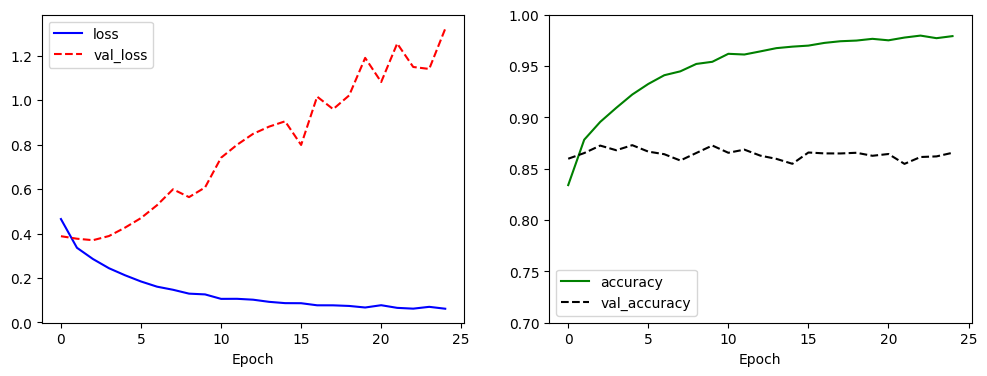

[1.3841084241867065, 0.863099992275238]

In [11]:
# 6.9 Fashion MNIST 분류 컨볼루션 신경망 모델 학습

history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

# 손실 그래프 - val_loss는 증가하는 과적합 형태 보임
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
# 검증 정확도 val_accuracy는 학습이 진행될수록 감소 
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()
# 첫째 결과가 테스트 데이터의 loss, 두번째 결과가 테스트 데이터의 accuracy
model.evaluate(test_X, test_Y, verbose=0)

In [12]:
# 6.10 Fashion MNIST 분류 컨볼루션 신경망 모델 정의 - 풀링 레이어, 드랍아웃 레이어 추가
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32),
    tf.keras.layers.MaxPool2D(strides=(2,2)), # stride를 증가시킴
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128),
    tf.keras.layers.Flatten(),# flatten 레이어 파라미터수가 30976 > 1152로 감소
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(rate=0.3),# 과적합 개선에 기여
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()# 총 파라미터 숫자가 24만개로 감소

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 flatten_1 (Flatten)         (None, 1152)             

Epoch 1/25
1407/1407 [==============================] - 8s 5ms/step - loss: 0.5239 - accuracy: 0.8110 - val_loss: 0.3621 - val_accuracy: 0.8679
Epoch 2/25
1407/1407 [==============================] - 7s 5ms/step - loss: 0.3615 - accuracy: 0.8702 - val_loss: 0.3375 - val_accuracy: 0.8747
Epoch 3/25
1407/1407 [==============================] - 7s 5ms/step - loss: 0.3161 - accuracy: 0.8852 - val_loss: 0.3098 - val_accuracy: 0.8865
Epoch 4/25
1407/1407 [==============================] - 7s 5ms/step - loss: 0.2875 - accuracy: 0.8938 - val_loss: 0.3202 - val_accuracy: 0.8895
Epoch 5/25
1407/1407 [==============================] - 7s 5ms/step - loss: 0.2663 - accuracy: 0.9018 - val_loss: 0.2983 - val_accuracy: 0.8951
Epoch 6/25
1407/1407 [==============================] - 7s 5ms/step - loss: 0.2497 - accuracy: 0.9078 - val_loss: 0.3025 - val_accuracy: 0.8955
Epoch 7/25
1407/1407 [==============================] - 8s 5ms/step - loss: 0.2322 - accuracy: 0.9148 - val_loss: 0.3043 - val_accuracy:

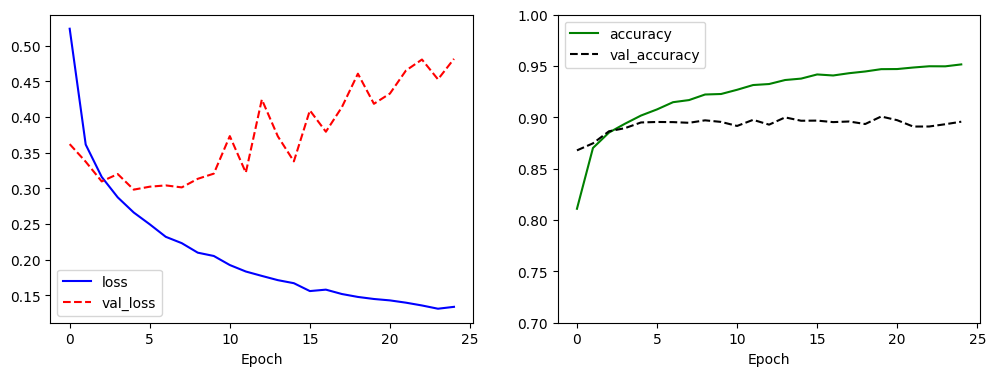

[0.4949789047241211, 0.894599974155426]

In [13]:
# 6.11 Fashion MNIST 분류 컨볼루션 신경망 모델 학습 - 풀링 레이어, 드랍아웃 레이어 추가
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
# val_loss는 여전히 증가
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy') # 일정 수준에 머물다
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)# 정확도 89%

#6.4 퍼포먼스 높이기

In [14]:
# 6.12 VGGNet 스타일의 Fashion MNIST 분류 컨볼루션 신경망 모델 정의
# VGG-19 모델이 가장 깊은 레이어 구조 > 특징 추출기 초반에 컨볼루션 레이어 2개 + 풀링 1개를 반복 2차례
# VGG-7: 7은 컨볼루션 갯수와 Dense 갯수 의 합 
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary() # 총 파라미터는 520만개 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_10 (Conv2D)          (None, 12, 12, 256)       295168    
                                                      

Epoch 1/25
1407/1407 [==============================] - 13s 8ms/step - loss: 0.5943 - accuracy: 0.7850 - val_loss: 0.3290 - val_accuracy: 0.8817
Epoch 2/25
1407/1407 [==============================] - 11s 8ms/step - loss: 0.3812 - accuracy: 0.8629 - val_loss: 0.2723 - val_accuracy: 0.8993
Epoch 3/25
1407/1407 [==============================] - 11s 8ms/step - loss: 0.3286 - accuracy: 0.8825 - val_loss: 0.2534 - val_accuracy: 0.9068
Epoch 4/25
1407/1407 [==============================] - 11s 8ms/step - loss: 0.3069 - accuracy: 0.8895 - val_loss: 0.2451 - val_accuracy: 0.9069
Epoch 5/25
1407/1407 [==============================] - 11s 8ms/step - loss: 0.2911 - accuracy: 0.8946 - val_loss: 0.2311 - val_accuracy: 0.9165
Epoch 6/25
1407/1407 [==============================] - 11s 8ms/step - loss: 0.2801 - accuracy: 0.8973 - val_loss: 0.2344 - val_accuracy: 0.9134
Epoch 7/25
1407/1407 [==============================] - 11s 8ms/step - loss: 0.2697 - accuracy: 0.9017 - val_loss: 0.2254 - val_ac

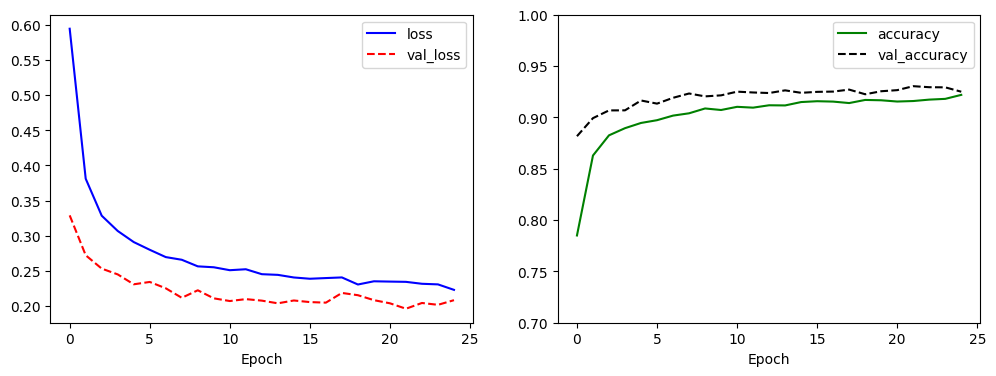

[0.22650885581970215, 0.9151999950408936]

In [15]:
# 6.13 VGGNet 스타일의 Fashion MNIST 분류 컨볼루션 신경망 모델 학습
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
# val_loss가 증가하지 않는다
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
#정확도가 92.52%로 좋다
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)

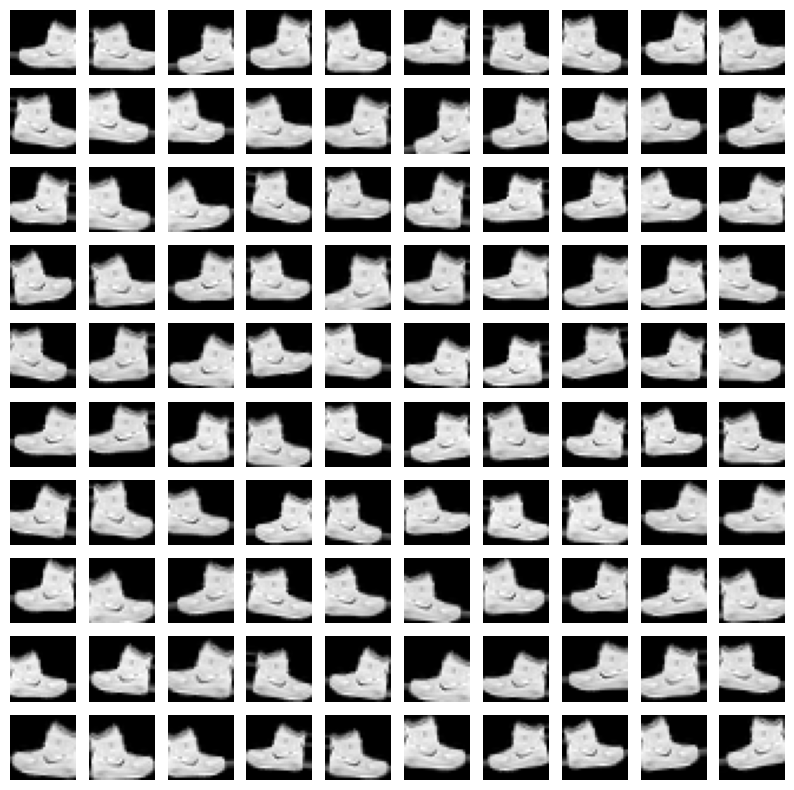

In [16]:
# 6.14 Image Augmentation 데이터 표시
# 이미지 보강은 훈련 데이터에 없는 이미지를 새롭게 만들어 훈련데이터를 보강하는 방법 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# 이 ImageDataGenerator 코드 부분은 다음 링크에서 참조했습니다. 
# https://github.com/franneck94/MNIST-Data-Augmentation/blob/master/mnist.py
# rotation, zoom, shift, flip 등을 지정합니다.
image_generator = ImageDataGenerator( # 훈련데이터의 표현력을 더 좋게 만드는 방법
            rotation_range=10,# 회전
            zoom_range=0.10,
            shear_range=0.5,#기울이거나
            width_shift_range=0.10,# 평행이동
            height_shift_range=0.10,
            horizontal_flip=True,#이미지를 가로로 뒤집다
            vertical_flip=False) # 이미지를 세로로 뒤집다

augment_size = 100
# flow()는 실제로 보강된 이미지를 생성
x_augmented = image_generator.flow(np.tile(train_X[0].reshape(28*28),100).reshape(-1,28,28,1),
                  np.zeros(augment_size), batch_size=augment_size, shuffle=False).next()[0]

# 새롭게 생성된 이미지 표시
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for c in range(100):
    plt.subplot(10,10,c+1)
    plt.axis('off')
    plt.imshow(x_augmented[c].reshape(28,28), cmap='gray')
plt.show()

In [17]:
# 6.15 Image Augmentation
image_generator = ImageDataGenerator(
            rotation_range=10,
            zoom_range=0.10,
            shear_range=0.5,
            width_shift_range=0.10,
            height_shift_range=0.10,
            horizontal_flip=True,
            vertical_flip=False)

augment_size = 30000 #훈련 데이터의 50%인 30,000개의 이미지 추가를 위해 설정

randidx = np.random.randint(train_X.shape[0], size=augment_size) # 60,000 정수 중에서 30,000 정수를 랜덤하게 추출
# np.random.choice()로 대체 가능
# randidx는 임의 정수들의 넘파이 배열
x_augmented = train_X[randidx].copy() # 복사한다 
y_augmented = train_Y[randidx].copy()
x_augmented = image_generator.flow(x_augmented, np.zeros(augment_size), 
                      batch_size=augment_size, shuffle=False).next()[0]
print(train_X.shape)
# 원래 데이터인 x_train 에 Image Augmentation 된 x_augmented 를 추가합니다.
train_X = np.concatenate((train_X, x_augmented)) # 이미지 보강
train_Y = np.concatenate((train_Y, y_augmented))
#train_X가 여러번 반복하면 누적 증가되어 이해가 필요 
print(train_X.shape)

(60000, 28, 28, 1)
(90000, 28, 28, 1)


Epoch 1/25
2110/2110 [==============================] - 18s 8ms/step - loss: 0.5720 - accuracy: 0.7918 - val_loss: 0.5583 - val_accuracy: 0.7851
Epoch 2/25
2110/2110 [==============================] - 17s 8ms/step - loss: 0.3811 - accuracy: 0.8628 - val_loss: 0.5195 - val_accuracy: 0.8077
Epoch 3/25
2110/2110 [==============================] - 17s 8ms/step - loss: 0.3412 - accuracy: 0.8769 - val_loss: 0.4573 - val_accuracy: 0.8328
Epoch 4/25
2110/2110 [==============================] - 18s 8ms/step - loss: 0.3217 - accuracy: 0.8846 - val_loss: 0.4131 - val_accuracy: 0.8474
Epoch 5/25
2110/2110 [==============================] - 17s 8ms/step - loss: 0.3045 - accuracy: 0.8897 - val_loss: 0.4252 - val_accuracy: 0.8411
Epoch 6/25
2110/2110 [==============================] - 17s 8ms/step - loss: 0.2948 - accuracy: 0.8946 - val_loss: 0.3885 - val_accuracy: 0.8573
Epoch 7/25
2110/2110 [==============================] - 17s 8ms/step - loss: 0.2923 - accuracy: 0.8949 - val_loss: 0.3954 - val_ac

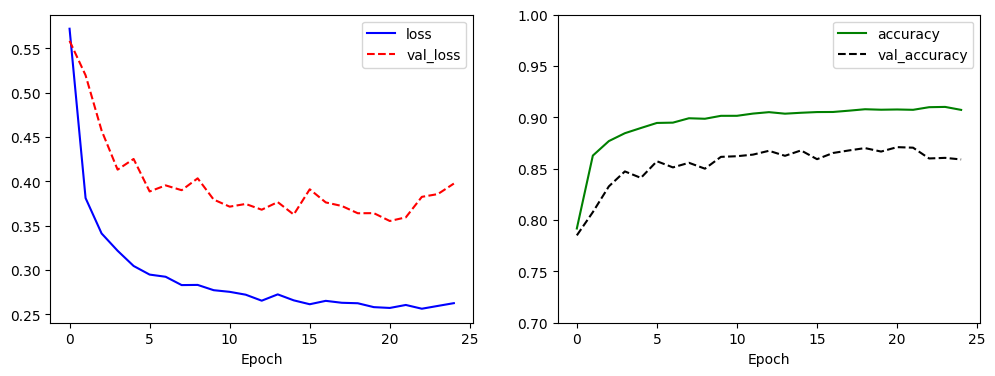

[0.21869048476219177, 0.9210000038146973]

In [18]:
# 6.16 VGGNet style 네트워크 + Image Augmentation 학습
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32, padding='same',
                           activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()
#분류 정확도가 92.88으로 92.52보다 약간 증가
model.evaluate(test_X, test_Y, verbose=0)